In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/movies.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


# PreProcessing

In [ ]:
uniqueCounts = data.nunique();
print("Unique count across columns:")
print(uniqueCounts);

Unique count across columns:
name        7512
rating        12
genre         19
year          41
released    3414
score         72
votes        936
director    2949
writer      4535
star        2814
country       59
budget       413
gross       7472
company     2385
runtime      138
dtype: int64


In [ ]:
data.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [ ]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
data.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [ ]:
df_reduced = data.fillna(data.mean())
df_reduced

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,9.270000e+05,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.900000e+07,4.699877e+07,Warner Bros.,146.000000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,6.500000e+04,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.500000e+06,5.885311e+07,Columbia Pictures,104.000000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1.200000e+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.800000e+07,5.383751e+08,Lucasfilm,124.000000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,2.210000e+05,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.500000e+06,8.345354e+07,Paramount Pictures,88.000000
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,1.080000e+05,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.000000e+06,3.984634e+07,Orion Pictures,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.100000,1.800000e+01,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7.000000e+03,7.850054e+07,NaN,90.000000
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.700000,3.600000e+01,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,3.558988e+07,7.850054e+07,Cactus Blue Entertainment,90.000000
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.700000,2.900000e+01,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,5.875000e+04,7.850054e+07,Embi Productions,107.261613
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",6.390411,8.810850e+04,James Randall,James Randall,Christina Roz,United States,1.500000e+04,7.850054e+07,NaN,120.000000


In [ ]:
df_reduced.isnull().sum()

name         0
rating      77
genre        0
year         0
released     2
score        0
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      0
dtype: int64

In [ ]:
# filling with Unknown class
df_clean = df_reduced.fillna("Unknown")
df_clean

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,9.270000e+05,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.900000e+07,4.699877e+07,Warner Bros.,146.000000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,6.500000e+04,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.500000e+06,5.885311e+07,Columbia Pictures,104.000000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1.200000e+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.800000e+07,5.383751e+08,Lucasfilm,124.000000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,2.210000e+05,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.500000e+06,8.345354e+07,Paramount Pictures,88.000000
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,1.080000e+05,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.000000e+06,3.984634e+07,Orion Pictures,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Unknown,Drama,2020,"October 23, 2020 (United States)",3.100000,1.800000e+01,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7.000000e+03,7.850054e+07,Unknown,90.000000
7664,Dream Round,Unknown,Comedy,2020,"February 7, 2020 (United States)",4.700000,3.600000e+01,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,3.558988e+07,7.850054e+07,Cactus Blue Entertainment,90.000000
7665,Saving Mbango,Unknown,Drama,2020,"April 27, 2020 (Cameroon)",5.700000,2.900000e+01,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,5.875000e+04,7.850054e+07,Embi Productions,107.261613
7666,It's Just Us,Unknown,Drama,2020,"October 1, 2020 (United States)",6.390411,8.810850e+04,James Randall,James Randall,Christina Roz,United States,1.500000e+04,7.850054e+07,Unknown,120.000000


In [ ]:
df_clean.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [ ]:
df_clean.describe()

,year
count,7668.000000
mean,2000.405451
std,11.153508
min,1980.000000
25%,1991.000000
50%,2000.000000
75%,2010.000000
max,2020.000000


Standard Scaling to normalise the data

In [ ]:
df_clean['success'] = df_clean.apply(lambda row: 1 if row["gross"] > row["budget"] else 0, axis = 1)
df_clean.success.value_counts(normalize=True)

1    0.524909
0    0.475091
Name: success, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_features = df_clean.copy()

col_names = ['gross','budget']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
print(scaled_features)

                                                name   rating      genre  \
0                                        The Shining        R      Drama   
1                                    The Blue Lagoon        R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back       PG     Action   
3                                          Airplane!       PG     Comedy   
4                                         Caddyshack        R     Comedy   
...                                              ...      ...        ...   
7663                                    More to Life  Unknown      Drama   
7664                                     Dream Round  Unknown     Comedy   
7665                                   Saving Mbango  Unknown      Drama   
7666                                    It's Just Us  Unknown      Drama   
7667                                       Tee em el  Unknown     Horror   

      year                          released     score         votes  \
0     1980     

The above data is normalised

# KNN Classification

In [ ]:
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X=df_clean.drop("score",axis=1)
y=df_clean.score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)

In [ ]:
X_train.shape

(5367, 15)

In [ ]:
df_clean.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,success
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1


**Classification**
Class Label: Success

In [ ]:
df_clean.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'success'],
      dtype='object')

In [ ]:
y = df_clean ['success']
X = df_clean.drop('name', axis = 1)
X = X.drop('rating', axis = 1)
X = X.drop('genre', axis = 1)
X = X.drop('released', axis = 1)
X = X.drop('director', axis = 1)
X = X.drop('writer', axis = 1)
X = X.drop('star', axis = 1)
X = X.drop('country', axis = 1)
X = X.drop('company', axis = 1)

# Separating the dependent and independent variable
  
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.3, random_state = 0)

Minkowski Distance

In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 7):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [ ]:
print(test_score)

0.9934810951760105


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


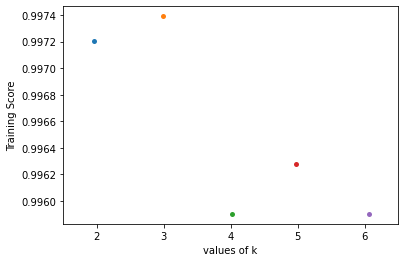

In [ ]:
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


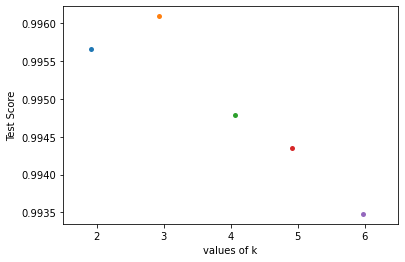

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

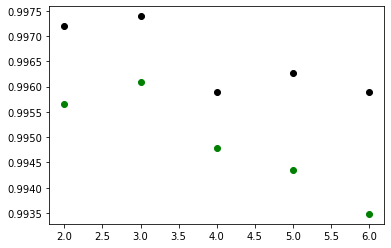

In [ ]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

Manhattan Distance Measure

In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 7):
    clf = KNeighborsClassifier(n_neighbors = k, p=1) 
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

print(test_score)

0.9956540634506736


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


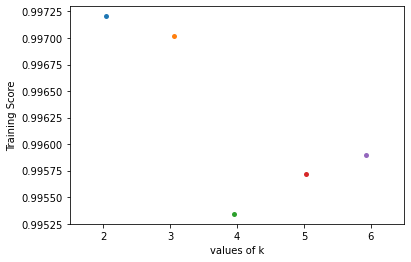

In [ ]:
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


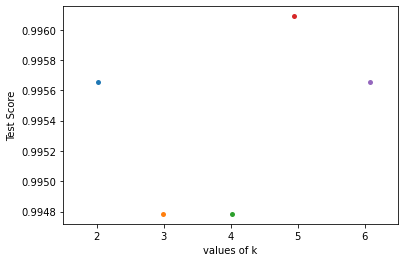

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

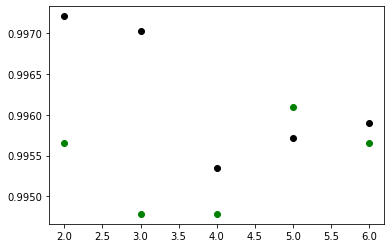

In [ ]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

Euclidean Distance Measure

In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 7):
    clf = KNeighborsClassifier(n_neighbors = k, p=2) 
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [ ]:
print(test_score)

0.9934810951760105


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


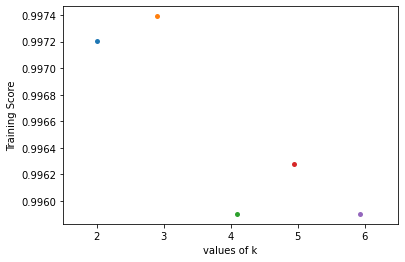

In [ ]:
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


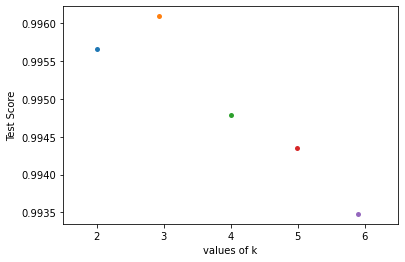

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

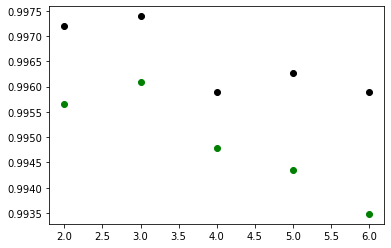

In [ ]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
test_df = X_test

In [ ]:
X_test.columns

Index(['year', 'score', 'votes', 'budget', 'gross', 'runtime', 'success'], dtype='object')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[1080    5]
 [  10 1206]]


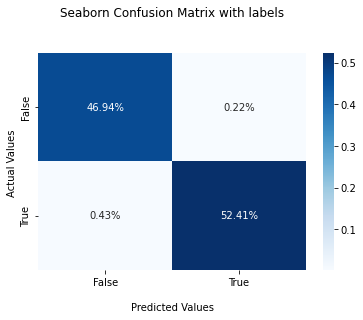

In [ ]:
import numpy as np
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99      1085\n           1       1.00      0.99      0.99      1216\n\n    accuracy                           0.99      2301\n   macro avg       0.99      0.99      0.99      2301\nweighted avg       0.99      0.99      0.99      2301\n'

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.9934810951760105

# Naive Bayes Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"  % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 2301 points : 470


In [ ]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 79.57409821816601


The Accuracy is found to be less with naive bayes compared to KNN

# K Means

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df2 = df_clean.drop(["name","genre","year","released","director","writer","star","country", "genre", "rating","company"], axis=1)

In [ ]:
df2.columns

Index(['score', 'votes', 'budget', 'gross', 'runtime'], dtype='object')

WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1

In [ ]:
distortions = []
for i in range (2,10):
  km = KMeans(n_clusters=i, init="random", n_init=10, max_iter=300, tol=1e-04, random_state=0)
  km.fit(df2)
  distortions.append(km.inertia_)

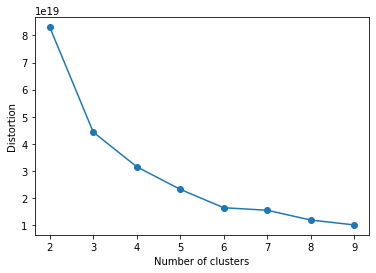

In [ ]:
plt.plot(range(2,10),distortions, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

The Optimum number of clusters are 6

In [ ]:
y_predict = km.fit_predict(df2)
y_predict

array([8, 3, 2, ..., 3, 3, 3], dtype=int32)

In [ ]:
km.inertia_

1.0098851039601512e+19

In [ ]:
df_imp=df2[['votes','budget']]

In [ ]:
df_imp.head()

,votes,budget
0,927000.0,19000000.0
1,65000.0,4500000.0
2,1200000.0,18000000.0
3,221000.0,3500000.0
4,108000.0,6000000.0


In [ ]:
x = df_imp

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 
y_predict 

array([2, 2, 2, ..., 2, 2, 0], dtype=int32)

In [ ]:
print(kmeans.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

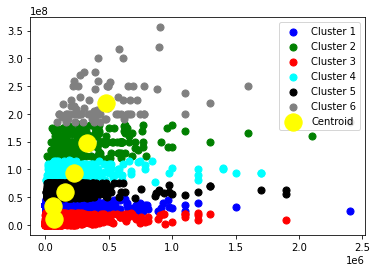

In [ ]:
x = np.array(x)
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 50, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s =50, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 50, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4') #for fourth cluster   
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 50, c = 'black', label = 'Cluster 5') #for fifth cluster  
plt.scatter(x[y_predict == 5, 0], x[y_predict == 5, 1], s = 50, c = 'grey', label = 'Cluster 6') #for sixth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.legend()  
plt.show() 

# Hierarchical Clustering

In [ ]:
df2 = df_clean.drop(["name","genre","year","released","director","writer","star","country", "genre", "rating","company"], axis=1)

In [ ]:
df2.columns

Index(['score', 'votes', 'budget', 'gross', 'runtime'], dtype='object')

In [ ]:
df_imp=df2[['votes','budget']]

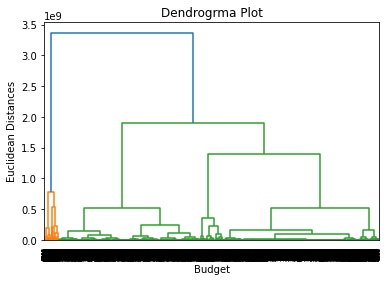

In [ ]:
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(df_imp, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Budget")  
plt.show()  

In [ ]:
x = df_imp

In [ ]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x)  

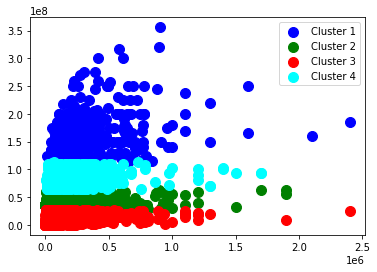

In [ ]:
#visulaizing the clusters  
import numpy as np
x = np.array(x)
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')   
plt.legend()  
plt.show()  

# Decision Tree

In [ ]:
df_clean['success'] = df_clean.apply(lambda row: 1 if row["gross"] > row["budget"] else 0, axis = 1)
df_clean.success.value_counts(normalize=True)

1    0.524909
0    0.475091
Name: success, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [ ]:
df_clean.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'success'],
      dtype='object')

In [ ]:
categorical_col = []
for column in df_clean.columns:
    if df_clean[column].dtype == object and len(df_clean[column].unique()) <= 50:
        categorical_col.append(column)

feature_cols = ['score', 'votes', 'budget', 'year','gross','runtime']
X = df_clean[feature_cols] # Features
y = df_clean.success # Target variable

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifeprint("Accuracy:",metrics.accuracy_score(y_test, y_pred))r
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9895697522816167


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[1070,   18],
       [   6, 1207]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


DecisionTreeClassifier(max_depth=9, min_samples_leaf=2)

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot
import pydotplus
from pydotplus import graph_from_dot_data

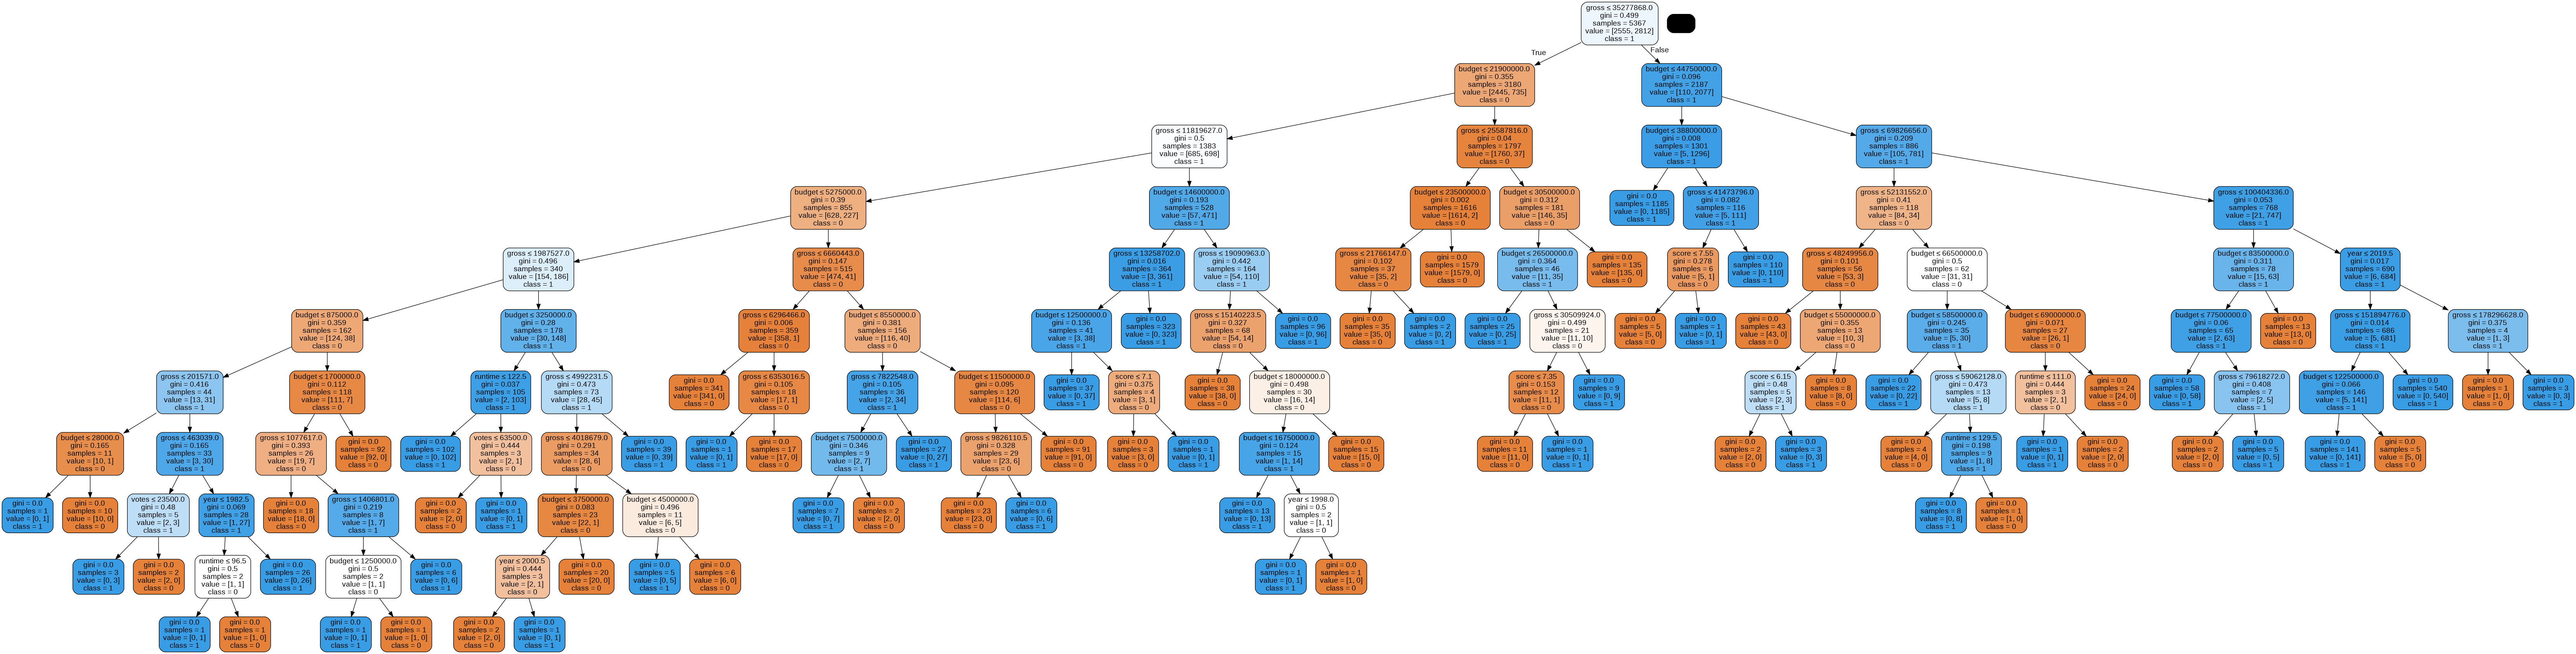

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('movies.png')
Image(graph.create_png())

# Back Propogation Neural Network

In [ ]:
df2 = df_clean.drop(["name","genre","year","released","director","writer","star","country", "genre", "rating","company"], axis=1)

In [ ]:
df2.columns

Index(['score', 'votes', 'budget', 'gross', 'runtime', 'success'], dtype='object')

In [ ]:
df2['success'] = df2.apply(lambda row: 1 if row["gross"] > row["budget"] else 0, axis = 1)
df2.success.value_counts(normalize=True)

1    0.524909
0    0.475091
Name: success, dtype: float64

In [ ]:
X = df2.iloc[:, [2,3,4]].values

In [ ]:
X.shape

(7668, 3)

In [ ]:
y = df2["success"].values

In [ ]:
y = pd.DataFrame(df2.success)

In [ ]:
y.shape

(7668, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

In [ ]:
# Initialize variables
learning_rate = 0.1
iterations = 5000
N = y_train.size

# number of input features
input_size = 3

# number of hidden layers neurons
hidden_size = 2 

# number of neurons at the output layer
output_size = 1  

results = pd.DataFrame(columns=["mse", "accuracy"])

In [ ]:
import numpy as np
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.max(axis=1) == y_true.max(axis=1)
    return acc.mean()

In [ ]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [ ]:
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))